#### **Bazy danych i hurtownie danych**
---
**Autor: Hanna Hankus**

"Inżynieria danych - data science", studia podyplomowe

Politechnika Gdańska

---

1. Pozyskanie danych z raportów World Happiness Report z lat (2015-2022) w formie plików .csv
2. Połączenie się z bazą danych Oracle na serwerze Politechniki Gdańskiej 
3. Zaimportowanie plików .csv do bazy danych
4. Utworzenie wirtualnego środowiska python
5. Połączenie z jupyter notebookiem
6. Wykonanie zapytania SQL w środowisku jupyter notebooka
7. Utworzenie pandas DataFrame na bazie tabeli SQLowej
8. Czyszczenie danych
9. Wyciągnięcie podstawowych statystyk w celu oceny rozkładu zmiennych i obecności punktów oddalonych

---

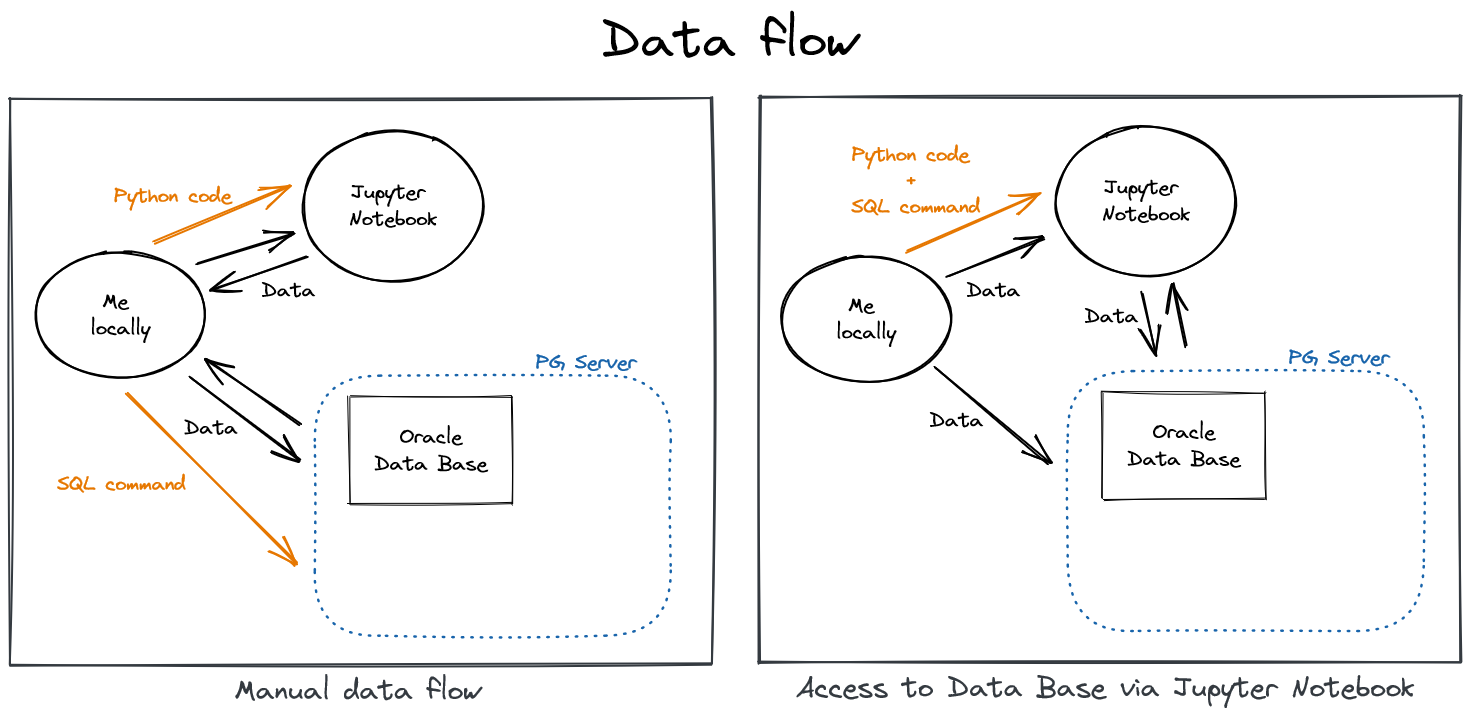

---

In [ ]:
#Import libarires
import cx_Oracle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Create dsn (Data Source Name) -> names hidden
dsn = cx_Oracle.makedsn(" ", 1521, service_name=" ")

#Connect to db server
connection = cx_Oracle.connect(user=" ", password=" ",
                               dsn=dsn, encoding="UTF-8")
#Execute queries
c = connection.cursor()
sql = """    SELECT * FROM 
        (SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            Family AS SocialSupport,
            LifeExpectancy AS HealthyLifeExpectancy,
            Freedom,
            TrustGovernmentCorruption AS PerceptionsOfCorruption,
            Generosity,
            --DystopiaResidual,
            2015 AS Year
        FROM happiness_2015
        UNION
        SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            Family AS SocialSupport,
            LifeExpectancy AS HealthyLifeExpectancy,
            Freedom,
            TrustGovernmentCorruption AS PerceptionsOfCorruption,
            Generosity,
            --DystopiaResidual,
            2016 AS Year
        FROM happiness_2016
        UNION
        SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            Family AS SocialSupport,
            HealthLifeExpectancy,
            Freedom,
            TrustGovernmentCorruption AS PerceptionsOfCorruption,
            Generosity,
            --DystopiaResidual,
            2017 AS Year
        FROM happiness_2017
        UNION
        SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            SocialSupport,
            HealthyLifeExpectancy,
            Freedom,
            PerceptionsOfCorruption,
            Generosity,
            2018 AS Year
        FROM happiness_2018
        UNION
        SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            SocialSupport,
            HealthyLifeExpectancy,
            Freedom,
            PerceptionsOfCorruption,
            Generosity,
            2019 AS Year
        FROM happiness_2019
        UNION
        SELECT 
            Country,
            RANK() OVER (ORDER BY ladderscore DESC) AS HappinessRank,
            LadderScore AS HappinessScore,
            GDPperCapita,
            SocialSupport,
            HealthyLifeExpectancy,
            Freedom,
            PerceptionsOfCorruption,
            Generosity,
            2020 AS Year
        FROM happiness_2020
        UNION
        SELECT 
            Country,
            RANK() OVER (ORDER BY ladderscore DESC) AS HappinessRank,
            LadderScore AS HappinessScore,
            GDPperCapita,
            SocialSupport,
            HealthyLifeExpectancy,
            Freedom,
            PerceptionsOfCorruption,
            Generosity,
            2021 AS Year
        FROM happiness_2021
        UNION
        SELECT 
            Country,
            HappinessRank,
            HappinessScore,
            GDPperCapita,
            SocialSupport,
            HealthyLifeExpectancy,
            Freedom,
            PerceptionsOfCorruption,
            Generosity,
            --DystopiaResidual
            2022 AS Year
        FROM happiness_2022)
    ORDER BY Year, HappinessRank
"""
c.execute(sql)
col_names = [row[0] for row in c.description]
records = c.fetchall()
happy_df = pd.DataFrame.from_records(records, columns=col_names)
happy_df.columns = [x.lower() for x in happy_df.columns]

In [ ]:
#merge df with regions
regions_df = pd.read_csv('data/world_happiness/regions.csv', header=0, index_col=False)
regions_df.columns = [x.lower() for x in regions_df.columns]
regions_df['country'] = regions_df['country'].str.strip()
happy_df = happy_df.merge(regions_df, how='left', on='country'.lower())
happy_df.info()

In [ ]:
happy_df.head()

In [ ]:
#add columns with avg happiness per country
happy_df['happiness_avg'] = happy_df.groupby('country')['happinessscore'].mean()

In [ ]:
#check distinct country names
unique_countries = happy_df['country'].unique()
print('Unique country names ')
print(unique_countries)
len(unique_countries)

In [ ]:
clean country names
print(happy_df[happy_df['country'].str.contains('Somalil', regex=False)])
happy_df.replace(to_replace =["Somaliland region", "Somaliland Region"], 
                            value ="Somaliland", inplace=True)
happy_df[happy_df['country'].str.contains('Congo', regex=False)]
happy_df.replace(to_replace = "Congo", 
                            value ="Congo (Kinshasa)", inplace=True)
happy_df[happy_df['country'].str.contains('Hong', regex=False)]
happy_df.replace(to_replace = ["Hong Kong S.A.R. of China", "Hong Kong S.A.R., China"], 
                            value ="Hong Kong", inplace=True)
happy_df[happy_df['country'].str.contains('Eswa', regex=False)]
happy_df.replace(to_replace = "Eswatini. Kingdom of", 
                            value ="Eswatini", inplace=True)

In [ ]:
#check and clean region names
list(happy_df['region'].unique())

In [ ]:
happy_df['region']=happy_df['region'].str.strip()
happy_df.replace(to_replace = ["Asia_Pacific", "Middle east"], 
                            value =["Asia-Pacific", "Middle East"], inplace=True)
list(happy_df['region'].unique())

In [ ]:
# Column names clening
list(happy_df.columns)
happy_df.columns = ['Country',
 'Happiness_Rank',
 'Happiness_Score',
 'GDP_per_Capita',
 'Social_Support',
 'Healthy_Fife_Expectancy',
 'Freedom',
 'Perceptions_Of_Corruption',
 'Generosity',
 'Year',
 'Region',
 'Happiness_avg']

In [ ]:
# Summaries for variables per year to check outliers
col_con= ['Happiness_Score', 'GDP_per_Capita','Social_Support', 'Healthy_Fife_Expectancy', 'Freedom', 'Perceptions_Of_Corruption', 'Generosity']
years = list(happy_df['Year'].unique())
years
happy_df.describe()
for y in years:
    y_desc = happy_df.loc[:, col_con].loc[happy_df['Year'] == y].describe()
    print("Summary for year ", y)
    print(y_desc)